# Legaue of Legends Project: 
## Predict the Outcome of a Game in the First 10 Minutes


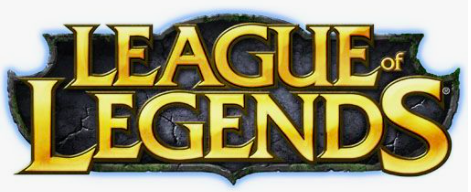

# 1. Introduction
League of Legends is a Multiplayer Online Battle Arena (MOBA). A standard game consists of two teams of five players, each fighting to push their way to their opponent’s base and destroy the building at its center, called the Nexus. 

There are currently 12 international professional leagues in League of Legends. Each league is zone specific and has its own collection of teams, who compete during the annual season to qualify for the League of Legends World Championship. The championship event consistently draws almost 100-million viewers worldwide, which makes it the most popular esport event in the world.

League of Legends is a game that requires lots of teamwork and strategy. In order to buy more powerful items, players need to kill minions and enemy players in lane in order to collect gold and grow level. There are also elite monsters that will give players extra buff but killing these elite monsters requires extra time and health. 

In this project, we will be looking at a dataset from Kaggle.com which collects game data via Riot's API. 

In [4]:
import numpy as np
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import types
import pandas as pd

path = '../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv'
df = pd.read_csv(path)

In [5]:
print('The dimension of this dataset is: ' + str(df.shape))

The dimension of this dataset is: (9879, 40)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Here we are able to see that this dataset contains all numerical data and does not have missing values, which comes in very handy since we do not need to clean the data.

In [7]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


We will drop feature gameID since it is just a sequence assigned to each game which doesn not help our project much; We will also remove feature

In [8]:
df.drop(columns = ['gameId'], inplace = True)

## Exploratory Data Analysis (EDA)

In [9]:
df['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

In [10]:
target = ['blueWins']
group_1 = ['blueFirstBlood', 'blueDragons', 'blueHeralds', 'blueEliteMonsters', 'blueTowersDestroyed']
for x in group_1:
    print('Win Correlation by:', x)
    print(df[[x, target[0]]].groupby(x, as_index=False).mean())
    print('-'*30, '\n')

Win Correlation by: blueFirstBlood
   blueFirstBlood  blueWins
0               0  0.397179
1               1  0.598957
------------------------------ 

Win Correlation by: blueDragons
   blueDragons  blueWins
0            0  0.418531
1            1  0.640940
------------------------------ 

Win Correlation by: blueHeralds
   blueHeralds  blueWins
0            0  0.476814
1            1  0.595046
------------------------------ 

Win Correlation by: blueEliteMonsters
   blueEliteMonsters  blueWins
0                  0  0.398565
1                  1  0.586344
2                  2  0.735211
------------------------------ 

Win Correlation by: blueTowersDestroyed
   blueTowersDestroyed  blueWins
0                    0  0.486458
1                    1  0.736597
2                    2  0.962963
3                    3  1.000000
4                    4  1.000000
------------------------------ 



### Total Gold and Gold Difference

Text(0, 0.5, 'Gold Diff')

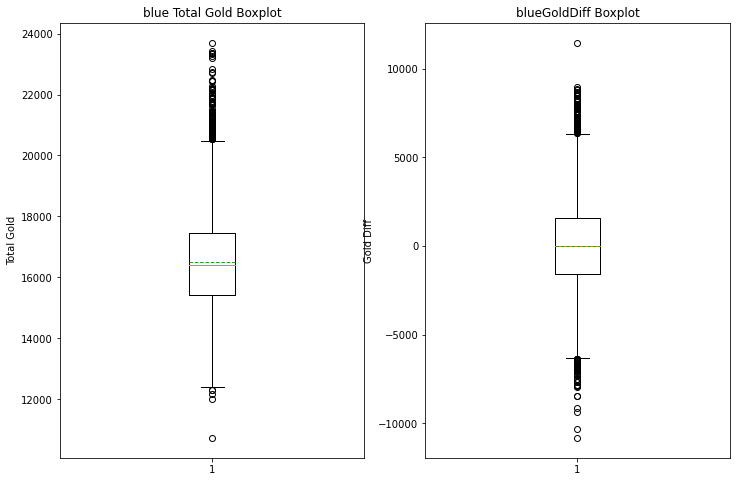

In [11]:
plt.figure(figsize=[12,8])

plt.subplot(121)
plt.boxplot(x=df['blueTotalGold'], showmeans = True, meanline = True)
plt.title('blue Total Gold Boxplot')
plt.ylabel('Total Gold')

plt.subplot(122)
plt.boxplot(x=df['blueGoldDiff'], showmeans = True, meanline = True)
plt.title('blueGoldDiff Boxplot')
plt.ylabel('Gold Diff')

Text(0.5, 0.98, 'Total Gold Distribution by blueWins')

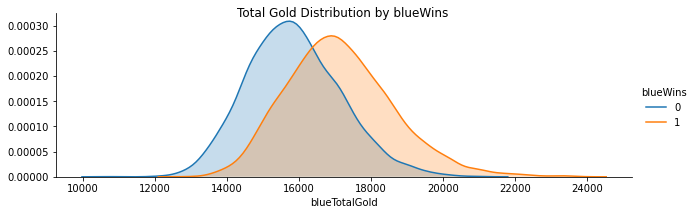

In [12]:
a = sns.FacetGrid(df, hue = 'blueWins', aspect = 3)
a.map(sns.kdeplot, 'blueTotalGold', shade= True )
a.add_legend()
a.fig.suptitle('Total Gold Distribution by blueWins')

Text(0.5, 0.98, 'Total Gold Difference by blueWins')

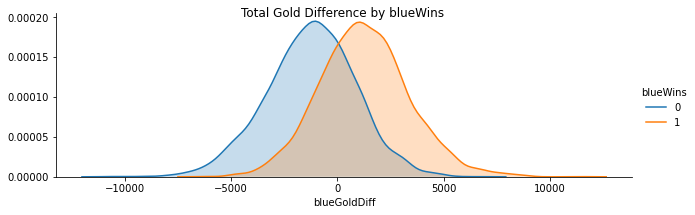

In [13]:
a = sns.FacetGrid(df, hue = 'blueWins', aspect = 3)
a.map(sns.kdeplot, 'blueGoldDiff', shade= True )
a.add_legend()
a.fig.suptitle('Total Gold Difference by blueWins')

### Total Experience, Experience Difference, and Average Level

Text(0, 0.5, 'Average Level')

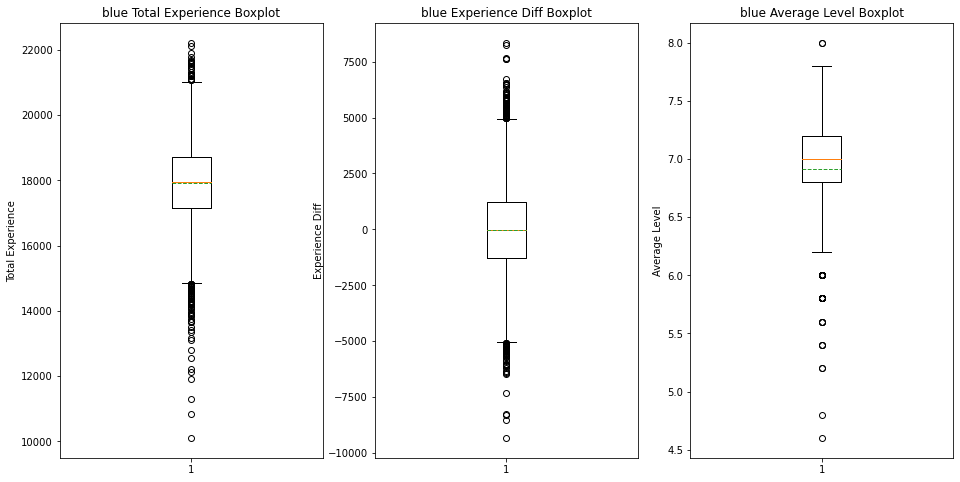

In [14]:
plt.figure(figsize=[16,8])

plt.subplot(131)
plt.boxplot(x=df['blueTotalExperience'], showmeans = True, meanline = True)
plt.title('blue Total Experience Boxplot')
plt.ylabel('Total Experience')

plt.subplot(132)
plt.boxplot(x=df['blueExperienceDiff'], showmeans = True, meanline = True)
plt.title('blue Experience Diff Boxplot')
plt.ylabel('Experience Diff')

plt.subplot(133)
plt.boxplot(x=df['blueAvgLevel'], showmeans = True, meanline = True)
plt.title('blue Average Level Boxplot')
plt.ylabel('Average Level')

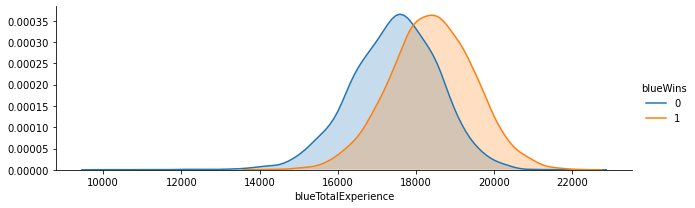

In [15]:
a = sns.FacetGrid(df, hue = 'blueWins', aspect = 3)
a.map(sns.kdeplot, 'blueTotalExperience', shade= True )
a.add_legend()

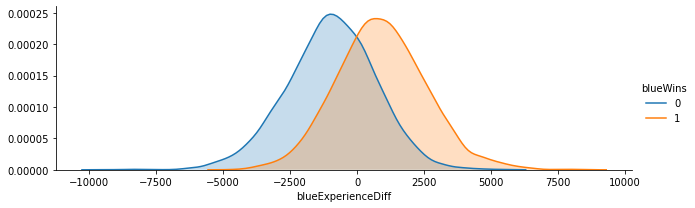

In [16]:
a = sns.FacetGrid(df, hue = 'blueWins', aspect = 3)
a.map(sns.kdeplot, 'blueExperienceDiff', shade= True )
a.add_legend()

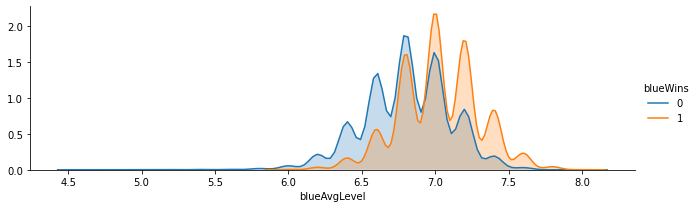

In [17]:
a = sns.FacetGrid(df, hue = 'blueWins', aspect = 3)
a.map(sns.kdeplot, 'blueAvgLevel', shade= True )
a.add_legend()

### Kills, Deaths and Assists

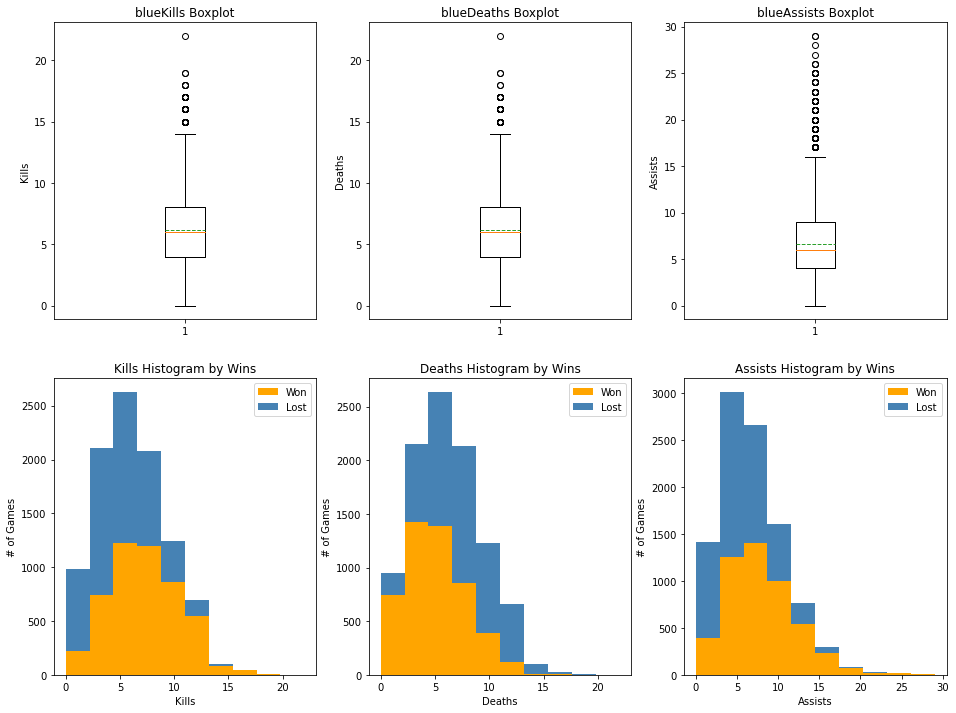

In [18]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=df['blueKills'], showmeans = True, meanline = True)
plt.title('blueKills Boxplot')
plt.ylabel('Kills')

plt.subplot(232)
plt.boxplot(x=df['blueDeaths'], showmeans = True, meanline = True)
plt.title('blueDeaths Boxplot')
plt.ylabel('Deaths')

plt.subplot(233)
plt.boxplot(x=df['blueAssists'], showmeans = True, meanline = True)
plt.title('blueAssists Boxplot')
plt.ylabel('Assists')

plt.subplot(234)
plt.hist(x = [df[df['blueWins']==1]['blueKills'], df[df['blueWins']==0]['blueKills']], 
         stacked=True, color = ['orange','steelblue'],label = ['Won','Lost'])
plt.title('Kills Histogram by Wins')
plt.xlabel('Kills')
plt.ylabel('# of Games')
plt.legend()

plt.subplot(235)
plt.hist(x = [df[df['blueWins']==1]['blueDeaths'], df[df['blueWins']==0]['blueDeaths']], 
         stacked=True, color = ['orange','steelblue'] ,label = ['Won','Lost'])
plt.title('Deaths Histogram by Wins')
plt.xlabel('Deaths')
plt.ylabel('# of Games')
plt.legend()

plt.subplot(236)
plt.hist(x = [df[df['blueWins']==1]['blueAssists'], df[df['blueWins']==0]['blueAssists']], 
         stacked=True, color = ['orange','steelblue'], label = ['Won','Lost'])
plt.title('Assists Histogram by Wins')
plt.xlabel('Assists')
plt.ylabel('# of Games')
plt.legend()

### First Blood

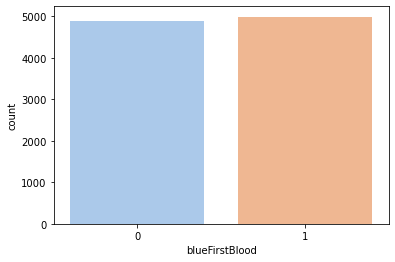

In [19]:
sns.countplot(df['blueFirstBlood'], palette = 'pastel')

Text(0.5, 1.0, 'Win Rate by First Blood')

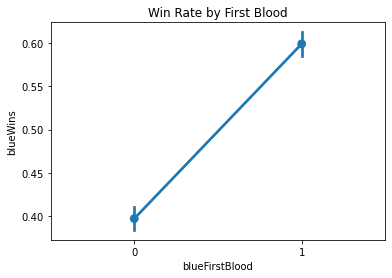

In [20]:
sns.pointplot(x = 'blueFirstBlood', y = 'blueWins',  data=df)
plt.title('Win Rate by First Blood')

### Wards Placed and Wards Destroyed

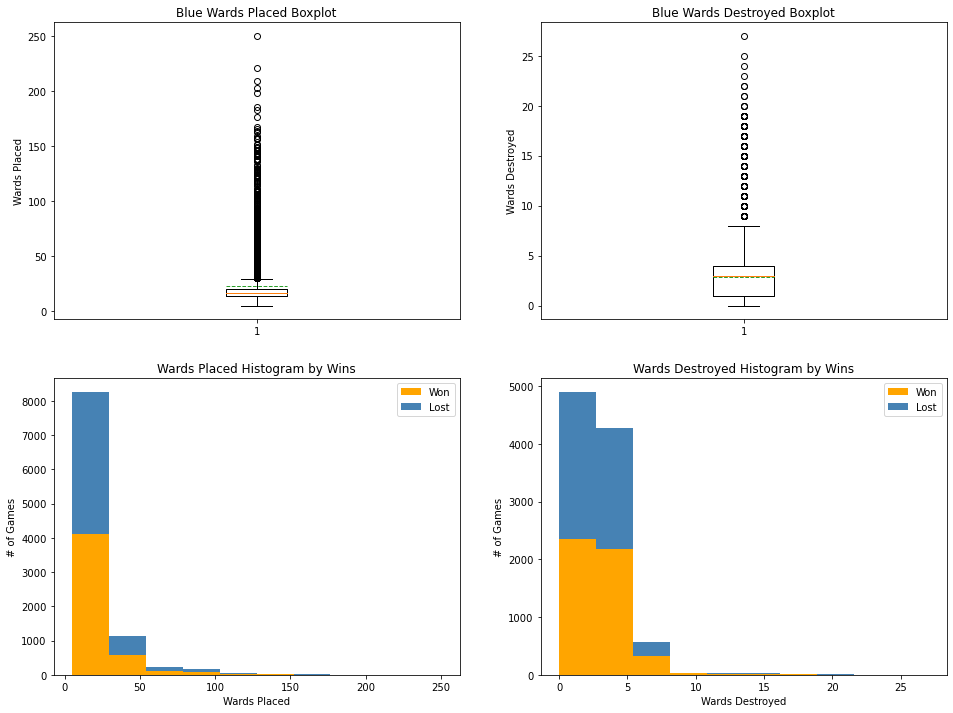

In [21]:
plt.figure(figsize=[16,12])

plt.subplot(221)
plt.boxplot(x=df['blueWardsPlaced'], showmeans = True, meanline = True)
plt.title('Blue Wards Placed Boxplot')
plt.ylabel('Wards Placed')

plt.subplot(222)
plt.boxplot(x=df['blueWardsDestroyed'], showmeans = True, meanline = True)
plt.title('Blue Wards Destroyed Boxplot')
plt.ylabel('Wards Destroyed')

plt.subplot(223)
plt.hist(x = [df[df['blueWins']==1]['blueWardsPlaced'], df[df['blueWins']==0]['blueWardsPlaced']], 
         stacked=True, color = ['orange','steelblue'], label = ['Won','Lost'])
plt.title('Wards Placed Histogram by Wins')
plt.xlabel('Wards Placed')
plt.ylabel('# of Games')
plt.legend()

plt.subplot(224)
plt.hist(x = [df[df['blueWins']==1]['blueWardsDestroyed'], df[df['blueWins']==0]['blueWardsDestroyed']], 
         stacked=True, color = ['orange','steelblue'], label = ['Won','Lost'])
plt.title('Wards Destroyed Histogram by Wins')
plt.xlabel('Wards Destroyed')
plt.ylabel('# of Games')
plt.legend()


### Elite Monsters (Dragons and Heralds) and Towers

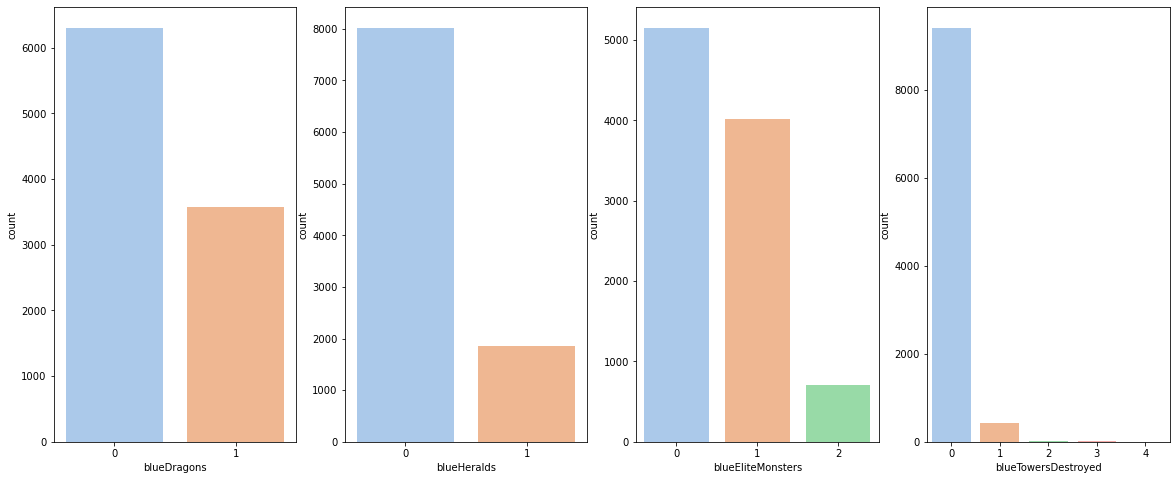

In [22]:
plt.figure(figsize=[20,8])

plt.subplot(141)
sns.countplot(df['blueDragons'], palette = 'pastel')
plt.subplot(142)
sns.countplot(df['blueHeralds'], palette = 'pastel')
plt.subplot(143)
sns.countplot(df['blueEliteMonsters'], palette = 'pastel')
plt.subplot(144)
sns.countplot(df['blueTowersDestroyed'], palette = 'pastel')


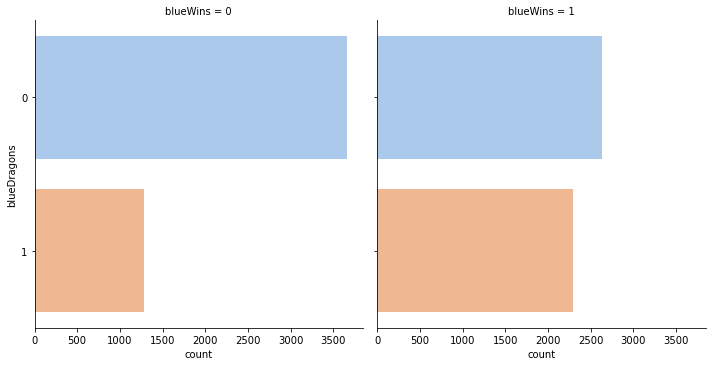

In [23]:
sns.catplot(y="blueDragons", col="blueWins", data=df, kind="count", palette = 'pastel')

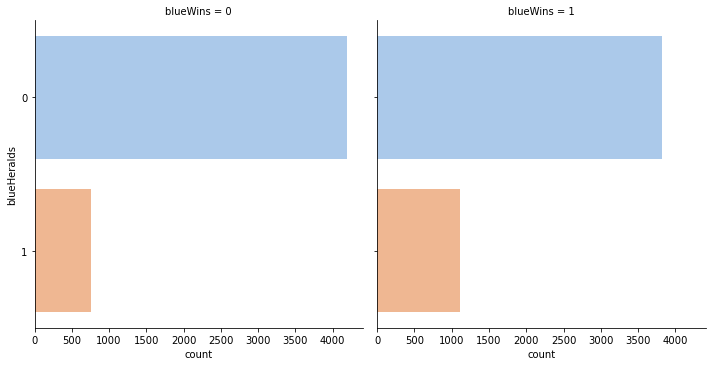

In [24]:
sns.catplot(y="blueHeralds", col="blueWins", data=df, kind="count", palette = 'pastel')

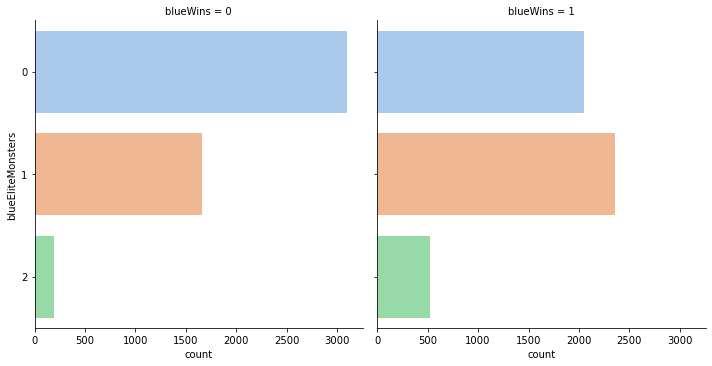

In [25]:
sns.catplot(y="blueEliteMonsters", col="blueWins", data=df, kind="count", palette = 'pastel')

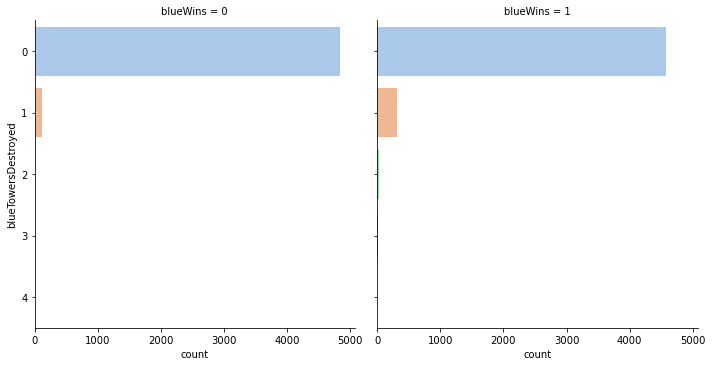

In [26]:
sns.catplot(y="blueTowersDestroyed", col="blueWins", data=df, kind="count", palette = 'pastel')

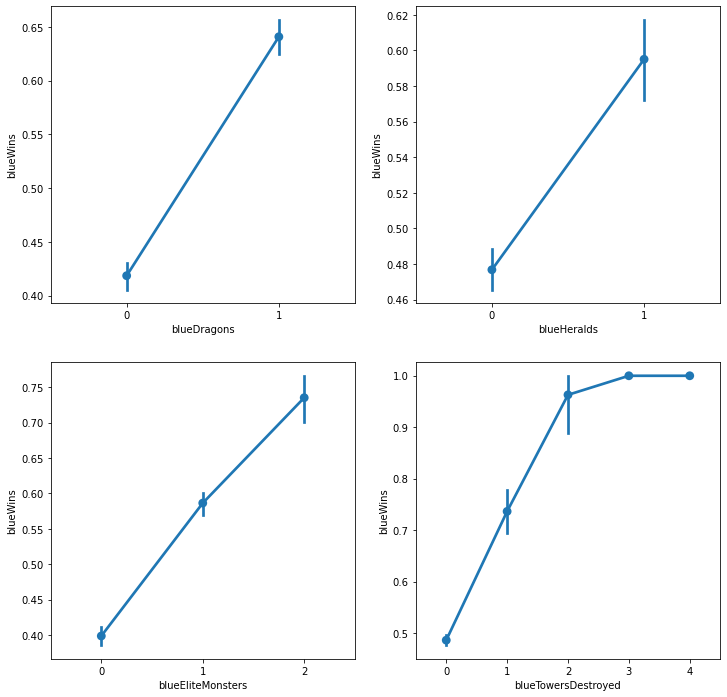

In [27]:
fig, saxis = plt.subplots(2, 2,figsize=(12,12))
sns.pointplot(x = 'blueDragons', y = 'blueWins',  data=df, ax = saxis[0,0])
sns.pointplot(x = 'blueHeralds', y = 'blueWins',  data=df, ax = saxis[0,1])
sns.pointplot(x = 'blueEliteMonsters', y = 'blueWins',  data=df, ax = saxis[1,0])
sns.pointplot(x = 'blueTowersDestroyed', y = 'blueWins',  data=df, ax = saxis[1,1])

### Minions Killed

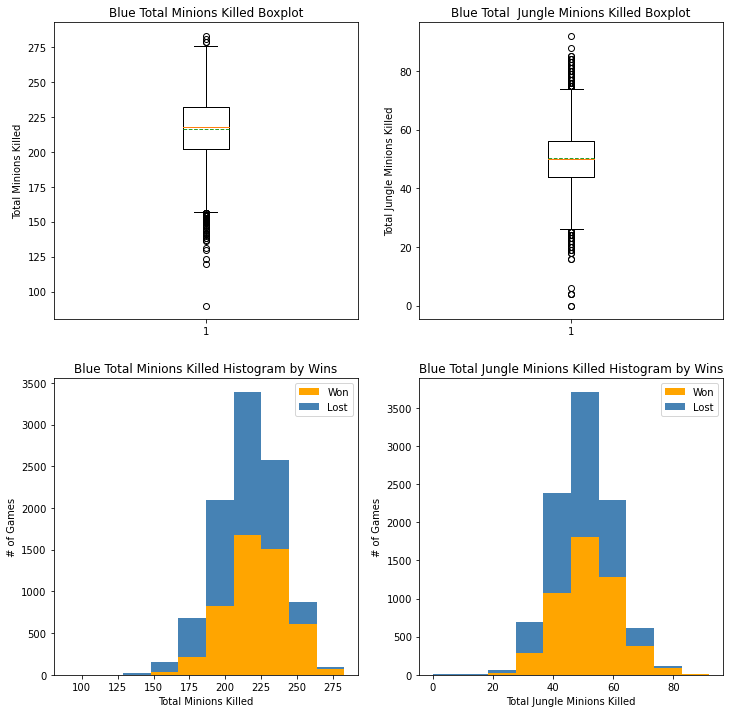

In [28]:
plt.figure(figsize=[12,12])

plt.subplot(221)
plt.boxplot(x=df['blueTotalMinionsKilled'], showmeans = True, meanline = True)
plt.title('Blue Total Minions Killed Boxplot')
plt.ylabel('Total Minions Killed')

plt.subplot(222)
plt.boxplot(x=df['blueTotalJungleMinionsKilled'], showmeans = True, meanline = True)
plt.title('Blue Total  Jungle Minions Killed Boxplot')
plt.ylabel('Total Jungle Minions Killed')


plt.subplot(223)
plt.hist(x = [df[df['blueWins']==1]['blueTotalMinionsKilled'], df[df['blueWins']==0]['blueTotalMinionsKilled']], 
         stacked=True, color = ['orange','steelblue'],label = ['Won','Lost'])
plt.title('Blue Total Minions Killed Histogram by Wins')
plt.xlabel('Total Minions Killed')
plt.ylabel('# of Games')
plt.legend()

plt.subplot(224)
plt.hist(x = [df[df['blueWins']==1]['blueTotalJungleMinionsKilled'], df[df['blueWins']==0]['blueTotalJungleMinionsKilled']], 
         stacked=True, color = ['orange','steelblue'],label = ['Won','Lost'])
plt.title('Blue Total Jungle Minions Killed Histogram by Wins')
plt.xlabel('Total Jungle Minions Killed')
plt.ylabel('# of Games')
plt.legend()

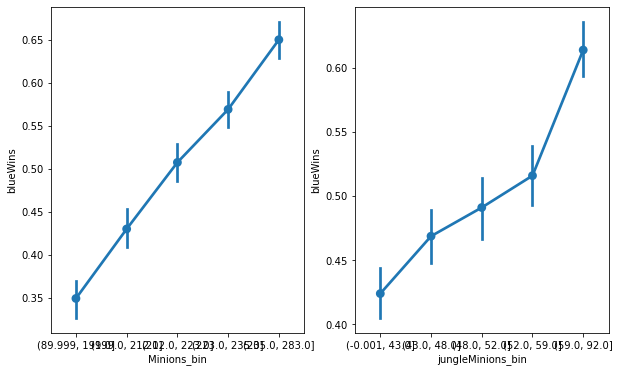

In [29]:
plt.figure(figsize=[10,6])
df['Minions_bin'] = pd.qcut(df['blueTotalMinionsKilled'], 5)
df['jungleMinions_bin'] = pd.qcut(df['blueTotalJungleMinionsKilled'], 5)
plt.subplot(121)
sns.pointplot(x = 'Minions_bin', y = 'blueWins',  data=df)

plt.subplot(122)
sns.pointplot(x = 'jungleMinions_bin', y = 'blueWins',  data=df)

### Grouped Features

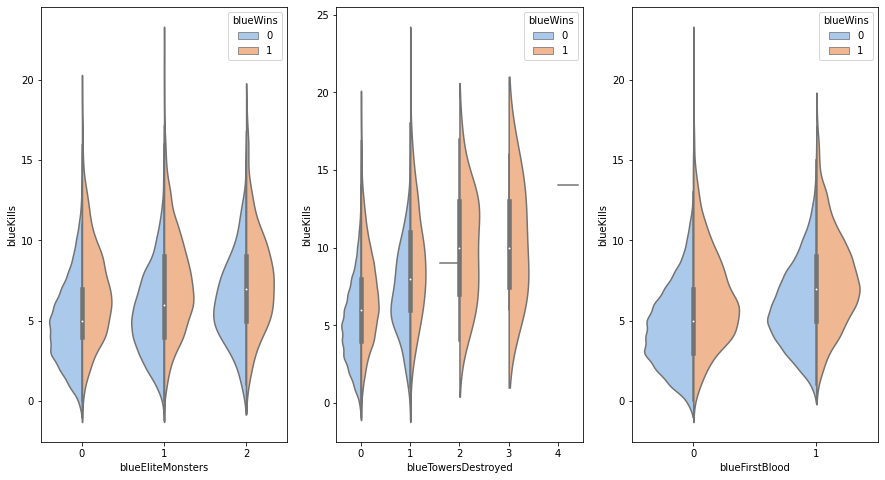

In [30]:
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(15,8))

sns.violinplot(x = 'blueEliteMonsters', y = 'blueKills', hue = 'blueWins', data = df, split = True, ax = axis1, palette = 'pastel')
sns.violinplot(x = 'blueTowersDestroyed', y = 'blueKills', hue = 'blueWins', data = df, split = True, ax = axis2, palette = 'pastel')
sns.violinplot(x = 'blueFirstBlood', y = 'blueKills', hue = 'blueWins', data = df, split = True, ax = axis3, palette = 'pastel')


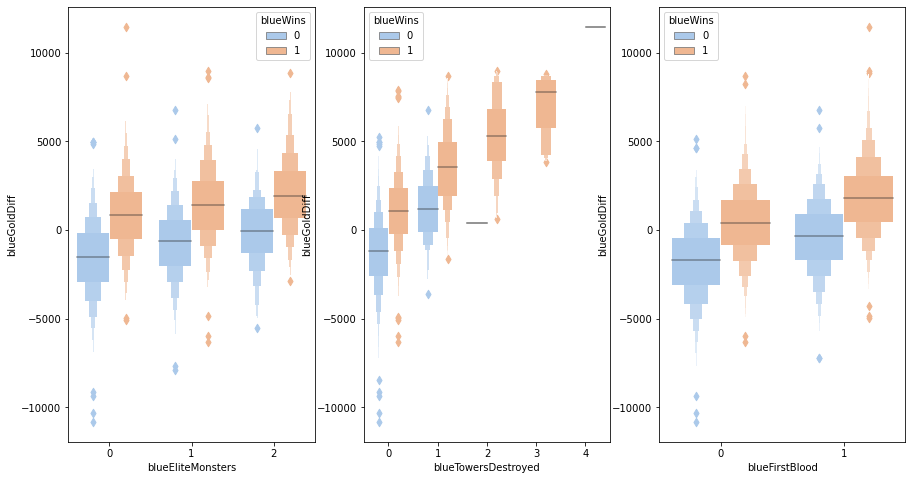

In [31]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,8))

sns.boxenplot(x = 'blueEliteMonsters', y = 'blueGoldDiff', hue = 'blueWins', data = df, ax = axis1, palette = 'pastel')
sns.boxenplot(x = 'blueTowersDestroyed', y = 'blueGoldDiff', hue = 'blueWins', data = df, ax = axis2, palette = 'pastel')
sns.boxenplot(x = 'blueFirstBlood', y = 'blueGoldDiff', hue = 'blueWins', data = df, ax = axis3, palette = 'pastel')


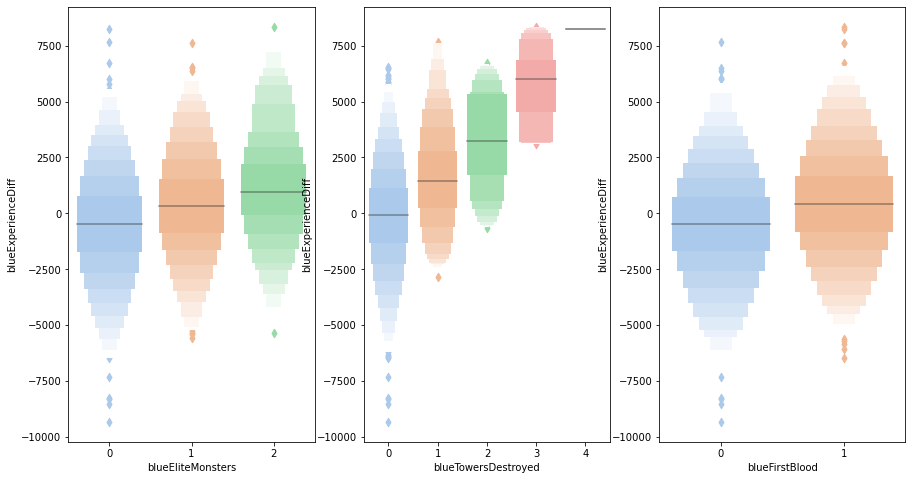

In [32]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,8))
sns.boxenplot(x="blueEliteMonsters", y="blueExperienceDiff", palette = 'pastel', scale="linear", data=df, ax = axis1)
sns.boxenplot(x="blueTowersDestroyed", y="blueExperienceDiff", palette = 'pastel', scale="linear", data=df, ax = axis2)
sns.boxenplot(x="blueFirstBlood", y="blueExperienceDiff", palette = 'pastel', scale="linear", data=df, ax = axis3)

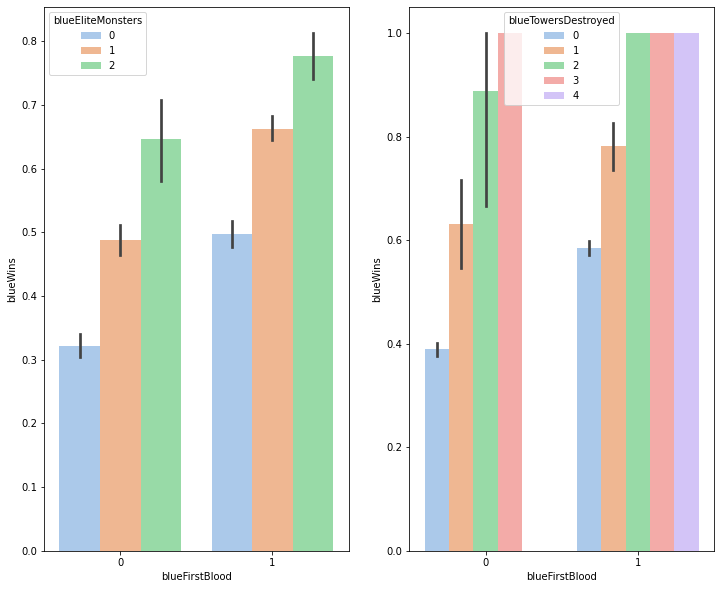

In [33]:
fig, qaxis = plt.subplots(1,2,figsize=(12,10))

sns.barplot(x = 'blueFirstBlood', y = 'blueWins', hue = 'blueEliteMonsters', data=df, ax = qaxis[0], palette = 'pastel')
sns.barplot(x = 'blueFirstBlood', y = 'blueWins', hue = 'blueTowersDestroyed', data=df, ax = qaxis[1], palette = 'pastel')

In [34]:
data1 = df.columns.tolist()[1:18]
df_data1 = df[data1]
data1

['blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff']

In [35]:
#sns.pairplot(df_data1)

In [36]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(12, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

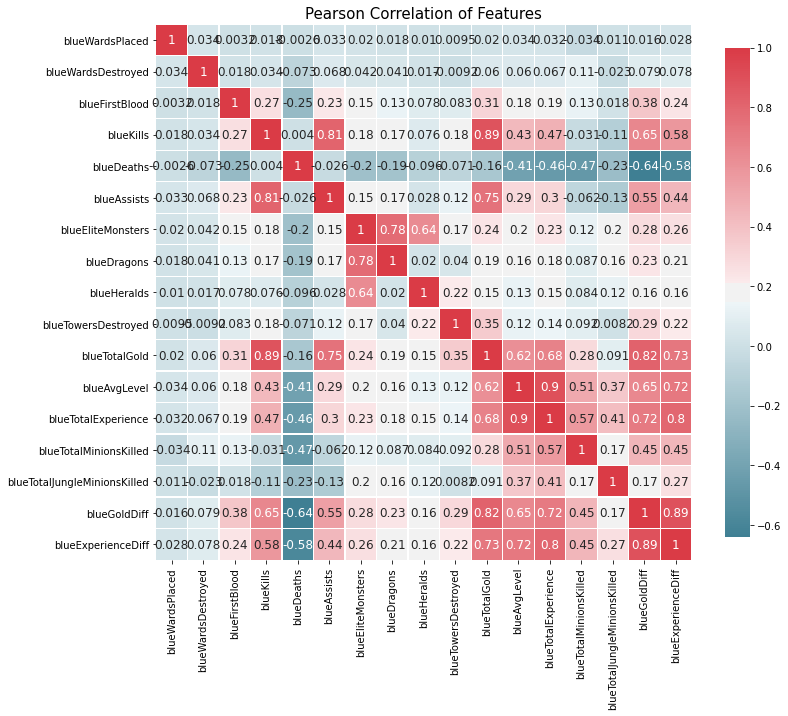

In [37]:
correlation_heatmap(df[data1])

## Model Building

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
df_model = df.drop(columns = ['blueWins', 'blueCSPerMin', 'blueGoldPerMin', 'redCSPerMin', 'redGoldPerMin', 'Minions_bin', 'jungleMinions_bin'])
df_model.columns

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills',
       'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df_model
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = df['blueWins']
print(X[:5])
print(y[:5])

[[ 3.16995664e-01 -3.79275139e-01  9.90429438e-01  9.35300855e-01
  -4.69261343e-02  1.07149547e+00 -8.79230989e-01 -7.53225651e-01
  -4.81132421e-01 -2.10439033e-01  4.60178970e-01 -1.03563482e+00
  -7.40639346e-01 -9.92781996e-01 -1.46595148e+00  2.56228388e-01
   1.33420105e-02 -3.99206522e-01  1.53249299e+00 -9.90429438e-01
  -4.69261343e-02  9.35300855e-01  3.29496150e-01 -9.14893437e-01
  -8.38965673e-01 -4.36494946e-01 -1.98352875e-01  5.22926764e-02
  -4.10474889e-01 -7.63214598e-01 -9.28740596e-01  3.67684541e-01
  -2.56228388e-01 -1.33420105e-02]
 [-5.70992189e-01 -8.39068868e-01 -1.00966304e+00 -3.93216348e-01
  -3.87796193e-01 -4.04768359e-01 -8.79230989e-01 -7.53225651e-01
  -4.81132421e-01 -2.10439033e-01 -1.16679157e+00 -1.03563482e+00
  -1.38539058e+00 -1.95355804e+00 -7.58722267e-01 -1.19125400e+00
  -5.93342484e-01 -5.61750948e-01 -8.05870137e-01  1.00966304e+00
  -3.87796193e-01 -3.93216348e-01 -1.14818826e+00  2.27770009e+00
   1.19194388e+00  2.29097727e+00  4.4123

### Split Train and Test Dataset

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

No. of samples in training set:  7409
No. of samples in validation set: 2470


### Base-line Performance 

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
xgb = XGBClassifier(random_state =0)
xgb.fit(X_train, y_train)
y_predict_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_predict_xgb)
f1_xgb = f1_score(y_test, y_predict_xgb, average='weighted')
print(classification_report(y_test, y_predict_xgb))
print("Test set Accuracy: ", accuracy_xgb)
print("F-1 score: ", f1_xgb)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1250
           1       0.69      0.70      0.69      1220

    accuracy                           0.70      2470
   macro avg       0.70      0.70      0.70      2470
weighted avg       0.70      0.70      0.70      2470

Test set Accuracy:  0.6975708502024291
F-1 score:  0.6975748659523373


### XGBoost

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
xgb = XGBClassifier(random_state =0)
xgb.fit(X_train, y_train)
y_predict_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_predict_xgb)
f1_xgb = f1_score(y_test, y_predict_xgb, average='weighted')
print(classification_report(y_test, y_predict_xgb))
print("Test set Accuracy: ", accuracy_xgb)
print("F-1 score: ", f1_xgb)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1250
           1       0.69      0.70      0.69      1220

    accuracy                           0.70      2470
   macro avg       0.70      0.70      0.70      2470
weighted avg       0.70      0.70      0.70      2470

Test set Accuracy:  0.6975708502024291
F-1 score:  0.6975748659523373


### Logistic Regression

In [44]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_predict_lr)
f1_lr = f1_score(y_test, y_predict_lr, average='weighted')
print(classification_report(y_test, y_predict_lr))
print("Test set Accuracy: ", accuracy_lr)
print("F-1 score: ", f1_lr)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1250
           1       0.72      0.72      0.72      1220

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470

Test set Accuracy:  0.7218623481781377
F-1 score:  0.7218609346775754


### Decision Tree

In [45]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_predict_dt)
f1_dt = f1_score(y_test, y_predict_dt, average='weighted')
print(classification_report(y_test, y_predict_dt))
print("Test set Accuracy: ", accuracy_dt)
print("F-1 score: ", f1_dt)

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1250
           1       0.63      0.64      0.64      1220

    accuracy                           0.64      2470
   macro avg       0.64      0.64      0.64      2470
weighted avg       0.64      0.64      0.64      2470

Test set Accuracy:  0.6384615384615384
F-1 score:  0.6384746352527264


In [46]:
result = {
  "Algorithm": ['Logistic Regression', 'Decision Tree', 'XGBoost'],
  "Accuracy": [accuracy_lr, accuracy_dt, accuracy_xgb],
  "F1-score": [f1_lr, f1_dt, f1_xgb],
}
pd.DataFrame(result).sort_values('Accuracy', ascending = False)

,Algorithm,Accuracy,F1-score
0,Logistic Regression,0.721862,0.721861
2,XGBoost,0.697571,0.697575
1,Decision Tree,0.638462,0.638475


## Feature Engineering

In [47]:
df_fe = df_model.copy()
df_fe.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff
0,28,2,1,9,6,11,0,0,0,0,...,0,0,0,16567,6.8,17047,197,55,-643,8
1,12,1,0,5,5,5,0,0,0,0,...,1,1,1,17620,6.8,17438,240,52,2908,1173
2,15,0,0,7,11,4,1,1,0,0,...,0,0,0,17285,6.8,17254,203,28,1172,1033
3,43,1,0,4,5,5,1,0,1,0,...,0,0,0,16478,7.0,17961,235,47,1321,7
4,75,4,0,6,6,6,0,0,0,0,...,1,0,0,17404,7.0,18313,225,67,1004,-230


### Generate New Features

In [49]:
df_fe['WardsPlacedDiff'] = df_fe['blueWardsPlaced'] - df_fe['redWardsPlaced']
df_fe['WardsDestroyedDiff'] = df_fe['blueWardsDestroyed'] - df_fe['redWardsDestroyed']
df_fe['LevelDiff'] = df_fe['blueAvgLevel'] - df_fe['redAvgLevel']
df_fe['KillsDiff'] = df_fe['blueKills'] - df_fe['redKills']
df_fe['DeathsDiff'] = df_fe['blueDeaths'] - df_fe['redDeaths']
df_fe['AssistsDiff'] = df_fe['blueAssists'] - df_fe['redAssists']
df_fe['DragonsDiff'] = df_fe['blueDragons'] - df_fe['redDragons']
df_fe['HeraldsDiff'] = df_fe['blueHeralds'] - df_fe['redHeralds']
df_fe['EliteMonstersDiff'] = df_fe['blueEliteMonsters'] - df_fe['redEliteMonsters']
df_fe['TowersDiff'] = df_fe['blueTowersDestroyed'] - df_fe['redTowersDestroyed']
df_fe['MinionsDiff'] = df_fe['blueTotalMinionsKilled'] - df_fe['redTotalMinionsKilled']
df_fe['JungleMinionsDiff'] = df_fe['blueTotalJungleMinionsKilled'] - df_fe['redTotalJungleMinionsKilled']

In [59]:
df_fe = df_fe[['WardsPlacedDiff', 'WardsDestroyedDiff', 'LevelDiff', 'KillsDiff', 'DeathsDiff', 'AssistsDiff', 'DragonsDiff', 
           'HeraldsDiff', 'EliteMonstersDiff', 'TowersDiff', 'MinionsDiff', 'JungleMinionsDiff']]

In [60]:
X = df_fe
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = df['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Shape of training set: ", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set:  (7409, 12)
Shape of test set: (2470, 12)


### XGBoost

In [61]:
xgb = XGBClassifier(random_state =0)
xgb.fit(X_train, y_train)
y_predict_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_predict_xgb)
f1_xgb = f1_score(y_test, y_predict_xgb, average='weighted')
print(classification_report(y_test, y_predict_xgb))
print("Test set Accuracy: ", accuracy_xgb)
print("F-1 score: ", f1_xgb)

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1250
           1       0.69      0.70      0.70      1220

    accuracy                           0.70      2470
   macro avg       0.70      0.70      0.70      2470
weighted avg       0.70      0.70      0.70      2470

Test set Accuracy:  0.7
F-1 score:  0.7000092938341558


### Logistic Regression

In [62]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_predict_lr)
f1_lr = f1_score(y_test, y_predict_lr, average='weighted')
print(classification_report(y_test, y_predict_lr))
print("Test set Accuracy: ", accuracy_lr)
print("F-1 score: ", f1_lr)

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1250
           1       0.71      0.70      0.71      1220

    accuracy                           0.71      2470
   macro avg       0.71      0.71      0.71      2470
weighted avg       0.71      0.71      0.71      2470

Test set Accuracy:  0.7109311740890688
F-1 score:  0.7109167667512543


In [63]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_predict_dt)
f1_dt = f1_score(y_test, y_predict_dt, average='weighted')
print(classification_report(y_test, y_predict_dt))
print("Test set Accuracy: ", accuracy_dt)
print("F-1 score: ", f1_dt)

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1250
           1       0.62      0.59      0.61      1220

    accuracy                           0.62      2470
   macro avg       0.62      0.62      0.62      2470
weighted avg       0.62      0.62      0.62      2470

Test set Accuracy:  0.617004048582996
F-1 score:  0.6167994631730533


### Performance Test After Feature Engineering

In [64]:
result = {
  "Algorithm": ['Logistic Regression', 'Decision Tree', 'XGBoost'],
  "Accuracy": [accuracy_lr, accuracy_dt, accuracy_xgb],
  "F1-score": [f1_lr, f1_dt, f1_xgb],
}
pd.DataFrame(result).sort_values('Accuracy', ascending = False)

,Algorithm,Accuracy,F1-score
0,Logistic Regression,0.710931,0.710917
2,XGBoost,0.700000,0.700009
1,Decision Tree,0.617004,0.616799


### Model Tuning

In [54]:
from sklearn.model_selection import GridSearchCV 
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [55]:
lr_tuned = LogisticRegression(random_state = 0)
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

clf_lr = GridSearchCV(lr_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring='accuracy')
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:  1.5min


Logistic Regression
Best Score: 0.7377522391133395
Best Parameters: {'C': 0.03359818286283781, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.6min finished


## Deep Learning Model

In [77]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [66]:
df_model.columns

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills',
       'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff'],
      dtype='object')

In [67]:
df['blueWins'] = df['blueWins'].astype('float64')
target = to_categorical(df['blueWins'])
predictors = df_model
predictors = preprocessing.StandardScaler().fit(predictors).transform(predictors.astype(float))

In [78]:
monitor_val_acc = EarlyStopping(monitor = 'val_acc', patience = 3)
modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

model = Sequential()
model.add(Dense(22, activation='relu', input_shape = (34, )))
model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
h_callback = model.fit(predictors, target, epochs=50, validation_split=0.25, callbacks = [monitor_val_acc, modelCheckpoint])

Epoch 1/50
232/232 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6753 - val_loss: 0.5758 - val_accuracy: 0.7105
Epoch 2/50
232/232 [==============================] - 0s 1ms/step - loss: 0.5561 - accuracy: 0.7139 - val_loss: 0.5605 - val_accuracy: 0.7138
Epoch 3/50
232/232 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.7201 - val_loss: 0.5543 - val_accuracy: 0.7166
Epoch 4/50
232/232 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.7217 - val_loss: 0.5502 - val_accuracy: 0.7206
Epoch 5/50
232/232 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.7237 - val_loss: 0.5472 - val_accuracy: 0.7206
Epoch 6/50
232/232 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.7267 - val_loss: 0.5461 - val_accuracy: 0.7182
Epoch 7/50
232/232 [==============================] - 0s 1ms/step - loss: 0.5348 - accuracy: 0.7275 - val_loss: 0.5450 - val_accuracy: 0.7215
Epoch 

In [74]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()
    
def plot_accuracy(accuracy,val_acc):
  plt.figure()
  plt.plot(accuracy)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

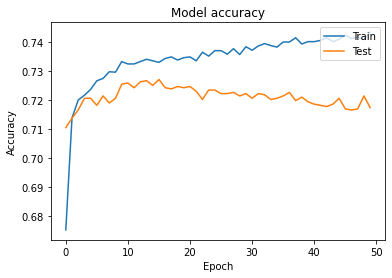

In [79]:
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

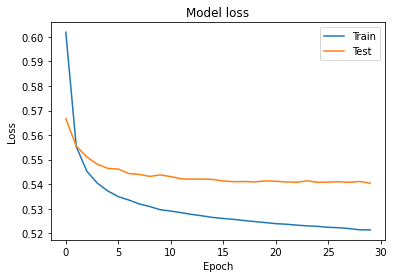

In [76]:
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])